# Machine Learning - Assignment 1

### Pierre-Yve Sojic

**Question 3 : Implement the k-means algorithm in a language of your choice, initializing the cluster centers randomly. The algorithm terminates when no further change in cluster assignments or centroids occurs.**


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('toydata.txt', sep='\s+', header=None, names=['X', 'Y'])
print(df)

         X      Y
0    0.501 -0.247
1    0.831 -1.171
2    0.335  0.429
3    0.207 -0.488
4   -0.778 -0.106
..     ...    ...
495  4.435 -2.214
496  4.058 -2.080
497  5.450 -3.735
498  5.051 -3.046
499  4.443 -3.105

[500 rows x 2 columns]


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/vm/mgglb02j0ks_1fvmd84gyw4c0000gn/T/ipykernel_49277/356249796.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('toydata.txt', sep='\s+', header=None, names=['X', 'Y'])


In [262]:
def compute_distortion(X, centroids, labels):
    distortion = 0
    for i, centroid in enumerate(centroids):
        distortion += np.sum((X[labels == i] - centroid)**2)
    return distortion

def kmeans_random(X, k, max_iter=100):
    n = X.shape[0]
    # Pick k random indices for initial centroids
    indices = np.random.choice(n, k, replace=False)
    centroids = X[indices]

    distortions = []
    for _ in range(max_iter):
        # Compute distance from every point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids as the mean of assigned points
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels==j) else centroids[j]
                                  for j in range(k)])
        # Compute and record distortion
        distortion = compute_distortion(X, new_centroids, labels)
        distortions.append(distortion)
        
        # Terminate if centroids do not change significantly
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels, distortions

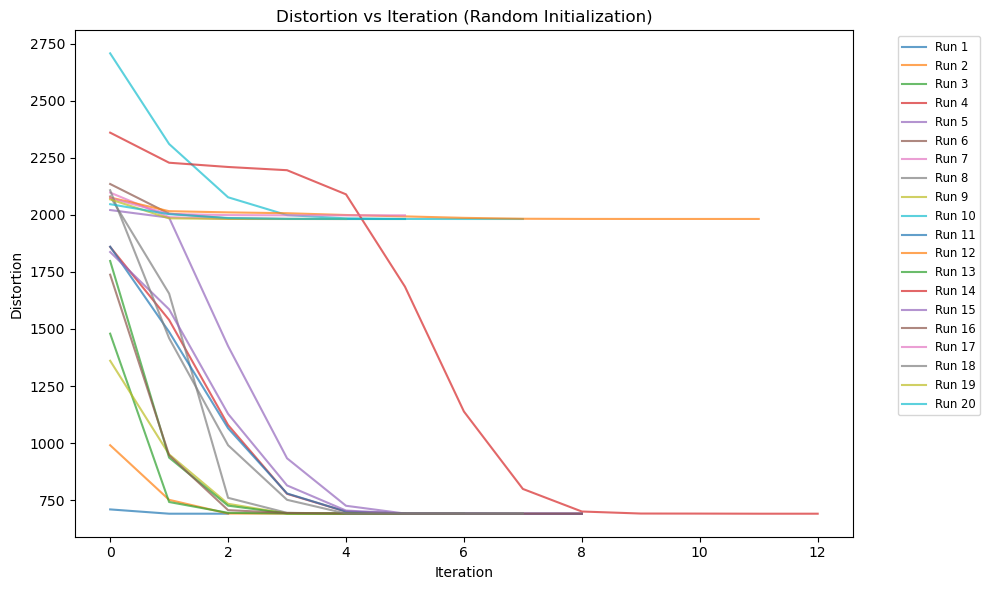

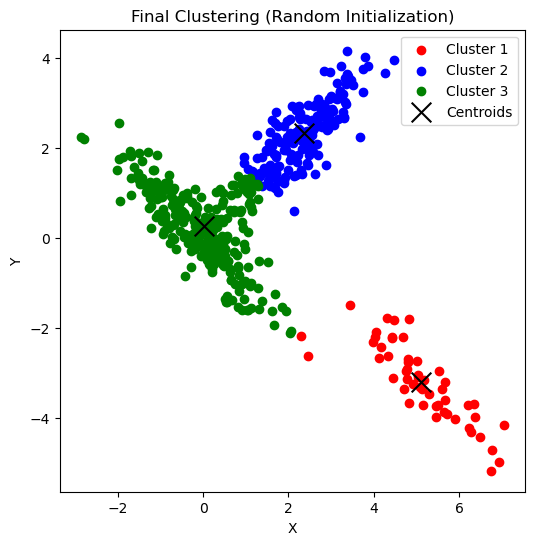

In [ ]:
X = df.values 
k = 3

# (a) Run k-means with random initialization 20 times and plot distortion vs. iteration
plt.figure(figsize=(10,6))
for run in range(20):
    centroids, labels, distortions = kmeans_random(X, k)
    plt.plot(distortions, label=f'Run {run+1}', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs Iteration (Random Initialization)')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the final clustering assignment (using one run from random initialization)
centroids, labels, distortions = kmeans_random(X, k)
plt.figure(figsize=(6,6))
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black', label='Centroids')
plt.title('Final Clustering (Random Initialization)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [266]:
def kmeans_pp(X, k, max_iter=100):
    """Run k-means using k-means++ initialization."""
    n = X.shape[0]
    centroids = []
    # Choose the first centroid randomly
    first_index = np.random.choice(n)
    centroids.append(X[first_index])
    
    # For each subsequent centroid, choose with probability proportional to squared distance
    for _ in range(1, k):
        dists = np.array([min(np.linalg.norm(x - centroid)**2 for centroid in centroids) for x in X])
        probabilities = dists / dists.sum()
        next_index = np.random.choice(n, p=probabilities)
        centroids.append(X[next_index])
    centroids = np.array(centroids)
    
    distortions = []
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels==j) else centroids[j]
                                  for j in range(k)])
        distortion = compute_distortion(X, new_centroids, labels)
        distortions.append(distortion)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels, distortions

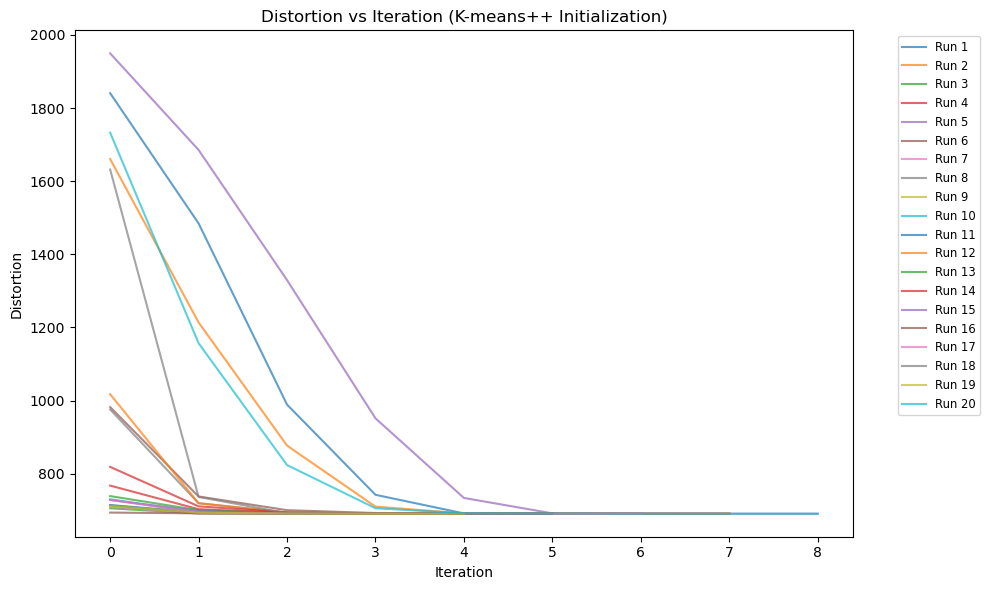

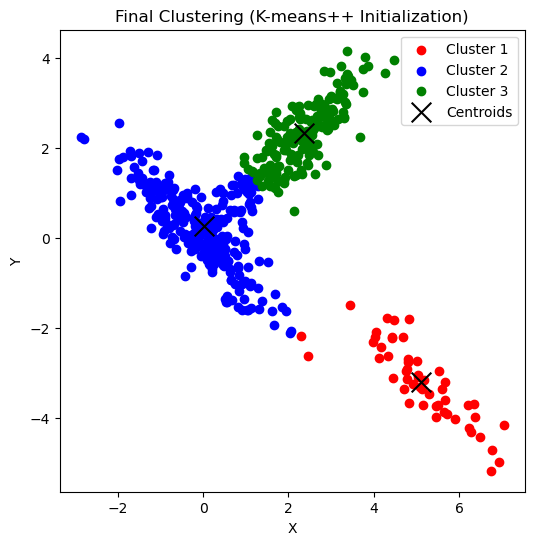

In [267]:
plt.figure(figsize=(10,6))
for run in range(20):
    centroids, labels, distortions = kmeans_pp(X, k)
    plt.plot(distortions, label=f'Run {run+1}', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs Iteration (K-means++ Initialization)')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the final clustering assignment (using one run from k-means++ initialization).
centroids, labels, distortions = kmeans_pp(X, k)
plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black', label='Centroids')
plt.title('Final Clustering (K-means++ Initialization)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()